In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
df = pd.read_csv('labounty_final.csv')
df.head()

,Date,Time_UTC,Cylinder Bore Pressure,Cylinder Rod Pressure
0,2/11/2019,19:21:23,46.41,NaN
1,2/11/2019,19:21:25,NaN,118.93
2,2/11/2019,19:22:23,46.41,NaN
3,2/11/2019,19:22:25,NaN,120.38
4,2/11/2019,19:23:23,46.41,NaN


In [68]:
# Null value assumption to 0
df = df.fillna(value = 0)

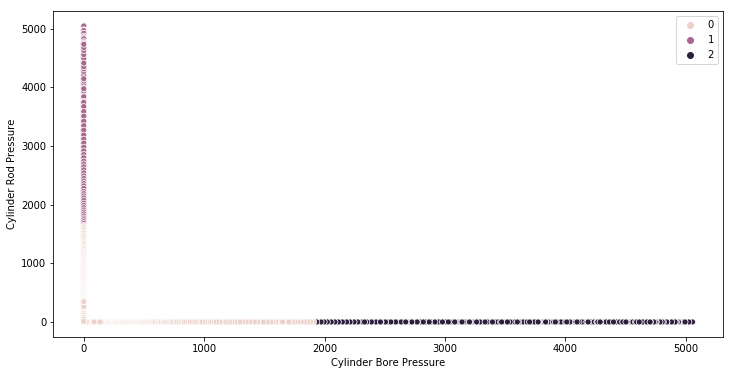

In [69]:
# Clustering
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(df.drop(['Date','Time_UTC'], axis=1))
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Cylinder Bore Pressure'], y= df['Cylinder Rod Pressure'], hue=kmean.labels_, )

In [87]:
# EDA
df[(df['Cylinder Rod Pressure']>4800) & (df['Date'] == '4/2/2019')].head()

,Date,Time_UTC,Cylinder Bore Pressure,Cylinder Rod Pressure
132766,4/2/2019,18:22:01,0.0,4959.0
132768,4/2/2019,18:22:01,0.0,4873.0
132769,4/2/2019,18:22:01,0.0,4828.0
132997,4/2/2019,18:23:11,0.0,4908.0
132999,4/2/2019,18:23:11,0.0,4947.0


In [109]:
df1 = pd.DataFrame(df['Cylinder Rod Pressure']) # Copy cylinder rod pressure as different dataframe
df2 = df.drop('Cylinder Rod Pressure', axis=1) # drop cylinder rod Pressure from df and assign it to df2
df1.drop(0, inplace = True) # drop the first record and reset the axis of df1, ie: Rod Pressure
df1 =  pd.DataFrame(df1.reset_index(drop=True)) # reset the index
df_updated = pd.concat([df2, df1], axis = 1) # now the data has been merged
df_updated.head(3) # check head of newdataframe , noticed Rod pressure data has been shifted up by 1 record, This will 
# give us approximate data for Bore and Rod pressure at the same exact time rather than the difference of millisecond.
# Machine measures in same time but it comes out in fraction of milisecond so we shifted up by 1 record so that the 
# two measures look like happened at the exact timestamp.Assuming our data is still accurate, lets proceed further.

,Date,Time_UTC,Cylinder Bore Pressure,Cylinder Rod Pressure
0,2/11/2019,19:21:23,46.41,118.93
1,2/11/2019,19:21:25,0.00,0.00
2,2/11/2019,19:22:23,46.41,120.38


In [123]:
df_updated = df_updated.replace(0.00, np.nan)
df_final = df_updated.dropna(thresh=4)
df_final = df_final.reset_index(drop=True)

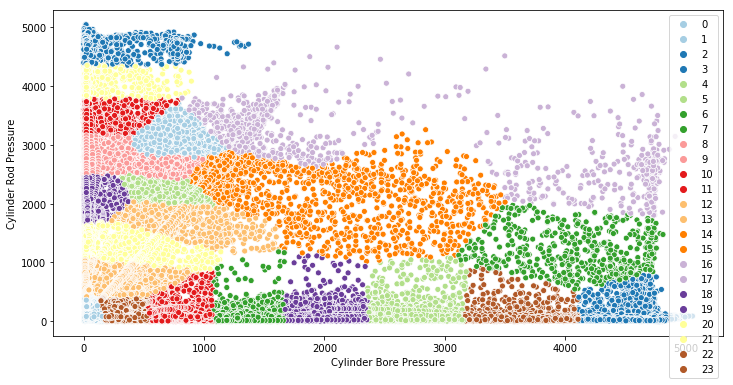

In [203]:
# Now try clustering with final and cleaned data set
kmean = KMeans(n_clusters=24)
kmean.fit(df_final.drop(['Date','Time_UTC'], axis=1))
plt.figure(figsize=(12,6))
sns.scatterplot(x='Cylinder Bore Pressure', y='Cylinder Rod Pressure', data=df_final ,hue=kmean.labels_, palette='Paired', legend='full')

In [204]:
df_final.groupby(kmean.labels_).count()

,Date,Time_UTC,Cylinder Bore Pressure,Cylinder Rod Pressure,Clusters
0,18689,18689,18689,18689,18689
1,3859,3859,3859,3859,3859
2,2160,2160,2160,2160,2160
3,4195,4195,4195,4195,4195
4,1989,1989,1989,1989,1989
5,5968,5968,5968,5968,5968
6,3292,3292,3292,3292,3292
7,571,571,571,571,571
8,1935,1935,1935,1935,1935
9,8215,8215,8215,8215,8215


In [205]:
df_final['Clusters'] = pd.DataFrame(kmean.labels_) # make a dataframe of created clusters and concat

In [206]:
df_final.groupby(by=['Date','Clusters']).count()['Cylinder Bore Pressure'].unstack()

Clusters,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2/11/2019,394.0,647.0,239.0,449.0,207.0,619.0,413.0,88.0,51.0,884.0,...,67.0,242.0,99.0,58.0,21.0,328.0,113.0,135.0,1014.0,154.0
2/12/2019,521.0,1104.0,357.0,662.0,369.0,1018.0,656.0,106.0,117.0,1465.0,...,146.0,365.0,72.0,5.0,29.0,483.0,239.0,254.0,1504.0,271.0
2/13/2019,253.0,590.0,183.0,320.0,187.0,483.0,255.0,53.0,60.0,667.0,...,59.0,175.0,85.0,7.0,34.0,265.0,115.0,147.0,683.0,101.0
3/13/2019,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/1/2019,246.0,182.0,185.0,393.0,316.0,919.0,491.0,72.0,92.0,1029.0,...,85.0,167.0,11.0,9.0,73.0,396.0,151.0,320.0,903.0,166.0
4/2/2019,151.0,317.0,181.0,376.0,255.0,733.0,381.0,71.0,70.0,1044.0,...,95.0,155.0,24.0,NaN,29.0,400.0,168.0,151.0,776.0,167.0
4/5/2019,12.0,15.0,11.0,16.0,NaN,NaN,1.0,2.0,2.0,NaN,...,1.0,NaN,11.0,1.0,NaN,NaN,2.0,NaN,13.0,NaN
6/14/2019,4547.0,63.0,139.0,209.0,88.0,249.0,115.0,8.0,277.0,405.0,...,22.0,126.0,NaN,26.0,232.0,136.0,543.0,283.0,1111.0,56.0
6/6/2019,50.0,6.0,4.0,5.0,NaN,4.0,NaN,2.0,1.0,8.0,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,7.0,5.0,NaN
